In [1]:
import json
with open('C:/Users/Saad/Downloads/archive (1)/evplan.json') as f:
    json_data = json.load(f)

In [2]:
json_data

[{'id': 1,
  'fleet': 1,
  'start_date': '2021-09-15',
  'end_date': '2021-09-16',
  'last_update_date': '2021-09-20',
  'n_monitored_cars': 2,
  'all_profiles_up_to_date': True,
  'monitoring_days_goal': 1,
  'is_active': False,
  'office_locations': [{'latitude': 52.3729606000185,
    'longitude': 20.7875775394544}],
  'home_charger_type': '1F',
  'office_charger_type': '1F',
  'charger_radius': 1.0,
  'home_radius': 1.0,
  'office_radius': 1.0,
  'description': 'Testing serializers',
  'aggregated_stats': {'distance_per_speed_limit': {'0_30': 3.9031577704965876,
    '30_50': 92.51219842819705,
    '50_70': 15.930891293928582,
    '70_90': 86.89039470799294,
    '90_120': 34.554512044968135,
    '120_plus': 15.602834190465275},
   'speed_limit_distribution': {'0_30': 0.015650568784650012,
    '30_50': 0.3709479887961281,
    '50_70': 0.0638784093948347,
    '70_90': 0.3484061314103167,
    '90_120': 0.13855390926485325,
    '120_plus': 0.06256299234921722},
   'distance_per_temp_clas

In [3]:
len(json_data)

1

In [5]:
data = json_data[0]
data['office_locations']

[{'latitude': 52.3729606000185, 'longitude': 20.7875775394544}]

In [6]:
data['aggregated_stats']['distance_per_speed_limit']

{'0_30': 3.9031577704965876,
 '30_50': 92.51219842819705,
 '50_70': 15.930891293928582,
 '70_90': 86.89039470799294,
 '90_120': 34.554512044968135,
 '120_plus': 15.602834190465275}

In [7]:
profiles = data['profiles']
len(profiles)

2

In [8]:
profiles[0]['car']

{'id': 145,
 'license_plate': 'WU2355L',
 'brand': 'Ford',
 'model': 'Transit Connect',
 'production_year': None,
 'data_source': 'dfm'}

In [9]:
profiles[1]['car']

{'id': 36,
 'license_plate': 'WI089HP',
 'brand': 'Ford',
 'model': 'TRANSIT CONNECT',
 'production_year': 2018,
 'data_source': 'dfm'}

In [10]:
profiles[0]['trips'] # Trip data for the first car

[{'id': 28,
  'driver': 41,
  'distance': 0.3657374163766829,
  'start_location': {'latitude': 49.54306886694533,
   'longitude': 20.57558131340788},
  'start_time': '2021-09-16T07:08:21Z',
  'end_time': '2021-09-16T07:11:11Z',
  'pause_duration': 0,
  'fastest_charger_nearby': None,
  'starts_home': False,
  'starts_office': False,
  'can_recharge': True},
 {'id': 29,
  'driver': 41,
  'distance': 23.771372718654323,
  'start_location': {'latitude': 49.54933131622194,
   'longitude': 20.57181106007328},
  'start_time': '2021-09-16T07:14:11Z',
  'end_time': '2021-09-16T07:42:12Z',
  'pause_duration': 180,
  'fastest_charger_nearby': None,
  'starts_home': False,
  'starts_office': False,
  'can_recharge': True},
 {'id': 31,
  'driver': 41,
  'distance': 68.7483711472295,
  'start_location': {'latitude': 49.730419736710076,
   'longitude': 20.398891792559734},
  'start_time': '2021-09-16T07:50:12Z',
  'end_time': '2021-09-16T08:56:04Z',
  'pause_duration': 480,
  'fastest_charger_nearby

In [11]:
for profile in data['profiles']:
    for trip in profile['trips']:
        trip['car_license_plate'] = profile['car']['license_plate']

trip_data = [
    trip for profile in data['profiles'] for trip in profile['trips']
]

for trip in trip_data:
    trip['start_latitude'] = trip['start_location']['latitude']
    trip['start_longitude'] = trip['start_location']['longitude']
    trip.pop('start_location')

In [12]:
trip_data[0] # data for the first trip

{'id': 28,
 'driver': 41,
 'distance': 0.3657374163766829,
 'start_time': '2021-09-16T07:08:21Z',
 'end_time': '2021-09-16T07:11:11Z',
 'pause_duration': 0,
 'fastest_charger_nearby': None,
 'starts_home': False,
 'starts_office': False,
 'can_recharge': True,
 'car_license_plate': 'WU2355L',
 'start_latitude': 49.54306886694533,
 'start_longitude': 20.57558131340788}

In [13]:
import pandas as pd
df = pd.DataFrame.from_dict(trip_data)
df.head()

,id,driver,distance,start_time,end_time,pause_duration,fastest_charger_nearby,starts_home,starts_office,can_recharge,car_license_plate,start_latitude,start_longitude
0,28,41,0.365737,2021-09-16T07:08:21Z,2021-09-16T07:11:11Z,0,None,False,False,True,WU2355L,49.543069,20.575581
1,29,41,23.771373,2021-09-16T07:14:11Z,2021-09-16T07:42:12Z,180,None,False,False,True,WU2355L,49.549331,20.571811
2,31,41,68.748371,2021-09-16T07:50:12Z,2021-09-16T08:56:04Z,480,None,False,False,False,WU2355L,49.730420,20.398892
3,30,41,0.888960,2021-09-16T09:00:14Z,2021-09-16T09:02:44Z,250,None,False,False,True,WU2355L,50.071996,20.032795
4,1,173,56.078058,2021-09-15T07:55:01Z,2021-09-15T09:05:06Z,0,None,True,False,True,WI089HP,54.207562,17.948875


In [14]:
df.car_license_plate.unique()

array(['WU2355L', 'WI089HP'], dtype=object)

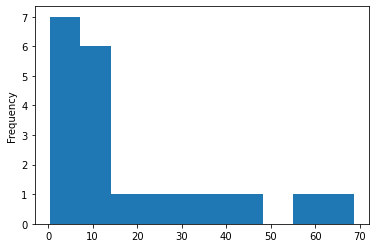

In [15]:
df.distance.plot.hist()

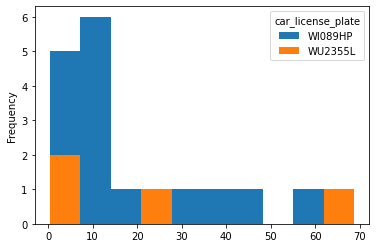

In [16]:
df.pivot(columns='car_license_plate', values='distance').plot.hist()

In [17]:
df.groupby('car_license_plate').distance.mean()

car_license_plate
WI089HP    16.72570
WU2355L    23.44361
Name: distance, dtype: float64

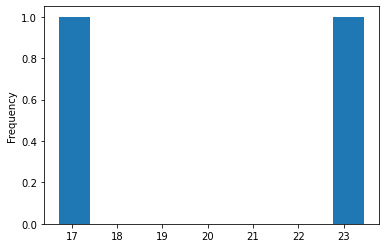

In [18]:
df.groupby('car_license_plate').distance.mean().plot.hist()